In [1]:
from actorcritic import ActorCriticAgent, EnvironmentWrapper
import gymnasium as gym
import datetime
import numpy as np

In [2]:
# hyperparameters
config = {
    'device': 'cuda',
    'state_size': 6, 
    'action_size': 3,
    'hidden_sizes': [64, 128], 
    'lr_actor': 0.001,
    'lr_critic': 0.005,
    'verbosity': 10,
    'env_name': 'CartPole-v1',
    'gamma': 0.99, 
    'reward_threshold': 475.0,
    'max_episodes': 2000,
    'max_steps': 500,
    'update_frequency': 500

}

In [3]:
# Initialize the environment
env = gym.make(config['env_name'])
env_wrapper = EnvironmentWrapper(env)

# Initialize the ActorCriticAgent
agent = ActorCriticAgent(config)

2024-03-10 15:22:59.295917: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-10 15:22:59.353291: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-10 15:22:59.353330: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-10 15:22:59.354588: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-10 15:22:59.363939: I tensorflow/core/platform/cpu_feature_guar

In [4]:
results = agent.train(env_wrapper, max_episodes=config['max_episodes'], max_steps=config['max_steps'], reward_threshold=config['reward_threshold'], update_frequency=config['update_frequency'])

Episode 0, Avg Reward: 11.0, PLoss: 12.329948425292969, VLoss: 10.970173835754395
Episode 10, Avg Reward: 14.363636363636363, PLoss: 14.370010375976562, VLoss: 53.076393127441406
Episode 20, Avg Reward: 14.142857142857142, PLoss: -2.010448455810547, VLoss: 154.3401336669922
Episode 30, Avg Reward: 13.774193548387096, PLoss: 2.090285301208496, VLoss: 83.60450744628906
Episode 40, Avg Reward: 13.975609756097562, PLoss: 0.6628789901733398, VLoss: 49.3265266418457
Episode 50, Avg Reward: 13.92156862745098, PLoss: -2.138699769973755, VLoss: 12.849617004394531
Episode 60, Avg Reward: 15.59016393442623, PLoss: -6.42643404006958, VLoss: 41.67621994018555
Episode 70, Avg Reward: 17.08450704225352, PLoss: -6.383593559265137, VLoss: 140.63609313964844
Episode 80, Avg Reward: 18.074074074074073, PLoss: 20.309797286987305, VLoss: 46.07106018066406
Episode 90, Avg Reward: 18.12087912087912, PLoss: 5.114573955535889, VLoss: 106.2548599243164
Episode 100, Avg Reward: 18.74, PLoss: 9.948989868164062, V

In [5]:
# Save the models
agent.save_models()

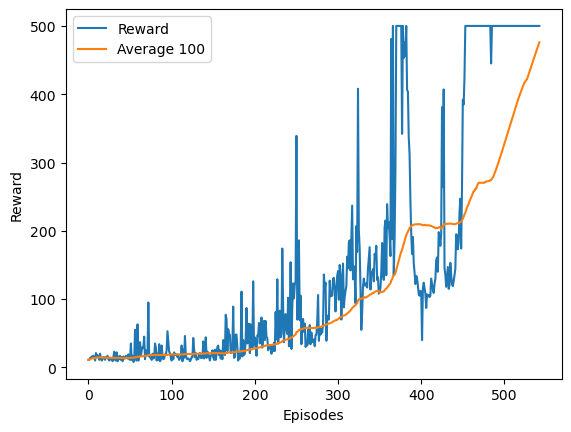

In [6]:
# plot results
import matplotlib.pyplot as plt

plt.plot(results['Episode'], results['Reward'], label='Reward')
plt.plot(results['Episode'], results['Average_100'], label='Average 100')
plt.xlabel('Episodes')
plt.ylabel('Reward')
plt.legend()
plt.show()


In [8]:
# save results with model name and time
now = datetime.datetime.now()
np.save(f'results/{config["env_name"]}_{now.strftime("%Y-%m-%d_%H-%M")}.csv', results)

In [12]:
%load_ext tensorboard


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [13]:
%tensorboard --logdir runs/